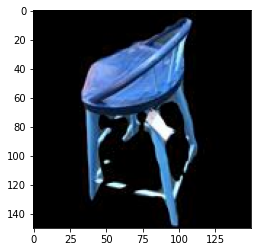

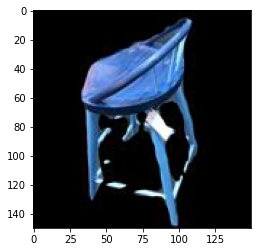

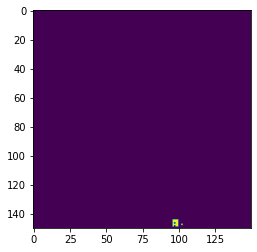

/data/cornucopia/fml35/experiments/debug_segmentation_6/cropped_and_masked_small/chair_1291_00.jpg
19


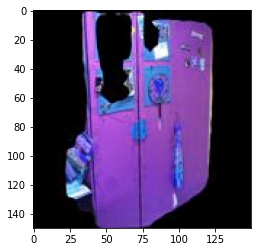

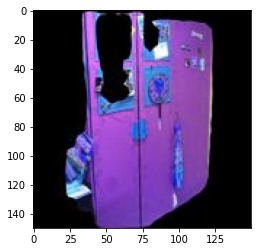

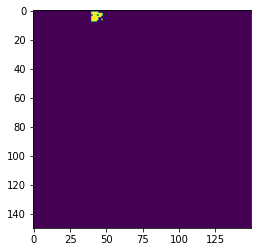

/data/cornucopia/fml35/experiments/debug_segmentation_6/cropped_and_masked_small/wardrobe_0153_02.jpg
41


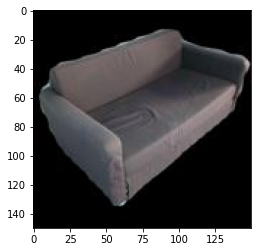

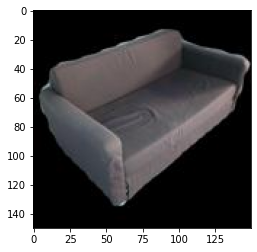

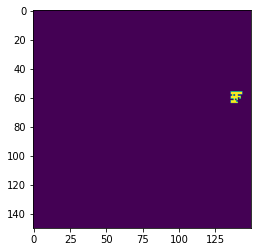

/data/cornucopia/fml35/experiments/debug_segmentation_6/cropped_and_masked_small/sofa_1674_00.jpg
43
done
57


In [25]:
import numpy as np
from glob import glob
import cv2
from tqdm import tqdm
import json
import os
from matplotlib import pyplot as plt

new_crops = '/data/cornucopia/fml35/experiments/debug_segmentation_6/cropped_and_masked_small/'
old_crops = '/data/cvfs/fml35/derivative_datasets/pix3d_new/own_data/real_images/img_150/s2_swin_epoch_66/predicted_segmentation_predicted_bbox'
# new_depths = '/data/cvfs/fml35/derivative_datasets/pix3d_new/own_data/depth/dummy_test/'


all = {}
all["pixel_diffs_crops"] = []

for cat in os.listdir(old_crops):
    # print(cat)
    for img in os.listdir(old_crops + '/' + cat): 
        old_path = old_crops + '/' + cat + '/' + img
        new_path = new_crops + cat + '_' + img.split('_')[0] + '_' + str(img.split('_')[1].split('.')[0]).zfill(2) + '.' + img.split('.')[1]
        assert new_path != old_path

        if os.path.exists(new_path):
            old = cv2.imread(old_path)
            new = cv2.imread(new_path)

            # print(old.dtype)
            # print(new.dtype)

            # print(dfd)
    

            mask = (old != new)
            mask = np.all(mask,axis=2)
         
            n_diff = int(np.sum(mask))

            if n_diff > 0:
                plt.imshow(old)
                plt.show()

                # new = new[53:203,53:203,:]
                plt.imshow(new)
                plt.show()

                plt.imshow(mask)
                plt.show()

                print(new_path)
                print(n_diff)

            all["pixel_diffs_crops"].append({"new_path":new_path,"old_path": old_path, "n_diff":n_diff})

            with open('/home/mifs/fml35/code/shape/leveraging_geometry_for_shape_estimation/tests/test_crops_results_debug_6.json','w') as f:
                json.dump(all,f)

print('done')
print(len(all["pixel_diffs_crops"]))

1
(array([317]), array([874]))


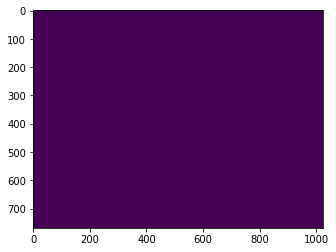

In [34]:
a =cv2.imread('/data/cornucopia/fml35/experiments/debug_segmentation_6/segmentation_masks/sofa_1674_0.png')
b = cv2.imread('/data/cvfs/fml35/derivative_datasets/pix3d_new/own_data/masks/masks_s2_all_relevant_predictions_swin_epoch_66/sofa/1674_0.png')
mask = (a!=b).all(axis=2)
print(np.sum(mask))
print(np.nonzero(mask > 0))
plt.imshow(mask)
plt.show()
